In [2]:
import torch
from train import train
from lofi_model import LofiModel
from dataset import MidiDataset
import pretty_midi
import numpy as np
from config import *

# TRAINING

In [4]:
if __name__ == "__main__":
    # Device setup
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

    # Dataset setup
    dataset_dir = r"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\Projekt zespolowy\dataset"

    # Model setup
    model = LofiModel(device)
    model.to(device)

    # Train
    train(model, 
          dataset_dir, 
          verbose=True, 
          model_save_path = "./saved_models/LSTM-VAE#1.pth")


Using cuda device
Starting MIDI dataset preprocessing from: C:\Users\Hyperbook\Desktop\STUDIA\SEM III\Projekt zespolowy\dataset
Found 272 MIDI files.
Processed 100/272 files.
Processed 200/272 files.


c:\Users\Hyperbook\Desktop\STUDIA\SEM III\Projekt zespolowy\venv\Lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Finished preprocessing. Total valid sequences: 272
  Skipped 0 files due to length filters.
  Skipped 0 files due to processing errors or being empty.
__________________________________________________

Epoch [1/1000]
Training Loss: 235291.6184
Reconstruction Loss: 108881.9160
KL Loss: 424.3340

Validation Loss: 109306.2461
------------------------------------------------------------ 

Epoch [2/1000]
Training Loss: 164573.7620
Reconstruction Loss: 92689.0605
KL Loss: 75.4829

Validation Loss: 92764.5449
------------------------------------------------------------ 

Epoch [3/1000]
Training Loss: 150513.5648
Reconstruction Loss: 91442.7266
KL Loss: 136.6118

Validation Loss: 91579.3418
------------------------------------------------------------ 

Epoch [4/1000]
Training Loss: 151508.4766
Reconstruction Loss: 90728.2539
KL Loss: 153.2548

Validation Loss: 90881.5078
------------------------------------------------------------ 

Epoch [5/1000]
Training Loss: 146001.4478
Reconstruction Los

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model = LofiModel(device)
model.to(device)
model.load_state_dict(torch.load("saved_models/LSTM-VAE#1.pth"))
model.to(device)
model.eval()

C:\Users\Hyperbook\AppData\Local\Temp\ipykernel_17704\1909559956.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("saved_models/LSTM-VAE#

LofiModel(
  (encoder): Encoder(
    (lstm): LSTM(88, 256, num_layers=2, batch_first=True, dropout=0.1)
    (hidden_to_mu): Linear(in_features=512, out_features=256, bias=True)
    (hidden_to_logvar): Linear(in_features=512, out_features=256, bias=True)
  )
  (decoder): Decoder(
    (latent_to_hidden): Linear(in_features=256, out_features=512, bias=True)
    (latent_to_cell): Linear(in_features=256, out_features=512, bias=True)
    (lstm): LSTM(88, 256, num_layers=2, batch_first=True, dropout=0.1)
    (fc_out): Linear(in_features=256, out_features=88, bias=True)
  )
)

## Reconstruction

In [4]:
dataset_dir = r"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\Projekt zespolowy\dataset"
dataset = MidiDataset(dataset_dir)

Starting MIDI dataset preprocessing from: C:\Users\Hyperbook\Desktop\STUDIA\SEM III\Projekt zespolowy\dataset
Found 272 MIDI files.
Processed 100/272 files.
Processed 200/272 files.
Finished preprocessing. Total valid sequences: 272
  Skipped 0 files due to length filters.
  Skipped 0 files due to processing errors or being empty.
__________________________________________________



c:\Users\Hyperbook\Desktop\STUDIA\SEM III\Projekt zespolowy\venv\Lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [7]:
original_sequence_tensor, original_length_val, file_path = dataset[10]
file_path

'C:\\Users\\Hyperbook\\Desktop\\STUDIA\\SEM III\\Projekt zespolowy\\dataset\\1 4 6 5 - chord progression.mid'

In [6]:
reconstructions = model.reconstruct(original_sequence_tensor)

In [6]:
dataset_dir = r"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\Projekt zespolowy\dataset"
dataset = MidiDataset(dataset_dir)

Starting MIDI dataset preprocessing from: C:\Users\Hyperbook\Desktop\STUDIA\SEM III\Projekt zespolowy\dataset
Found 272 MIDI files.
Processed 100/272 files.
Processed 200/272 files.
Finished preprocessing. Total valid sequences: 272
  Skipped 0 files due to length filters.
  Skipped 0 files due to processing errors or being empty.
__________________________________________________



In [19]:
original_sequence_tensor, original_length_val, file_path = dataset[10]
original_sequence_tensor.shape

torch.Size([63, 88])

In [20]:
padded_original_sequence, original_length_tensor = MidiDataset.collate_fn([(original_sequence_tensor, original_length_val)])
padded_original_sequence = padded_original_sequence.to(device)
padded_original_sequence.shape

torch.Size([1, 63, 88])

In [21]:
reconstructed_sample, _, _ = model(padded_original_sequence, original_length_tensor)
reconstructed_sample = reconstructed_sample.squeeze()
reconstructed_sample = torch.sigmoid(reconstructed_sample)
reconstructed_sample[reconstructed_sample < 0.5] = 0
reconstructed_sample[reconstructed_sample >= 0.5] = 1
reconstructed_sample.shape

torch.Size([63, 88])

In [ ]:
reconstructed_sample_T = reconstructed_sample.T
reconstructed_sample_T.shape
reconstructed_sample_T

torch.Size([88, 63])

In [23]:
file_path

'C:\\Users\\Hyperbook\\Desktop\\STUDIA\\SEM III\\Projekt zespolowy\\dataset\\1 4 6 5 - chord progression.mid'

In [24]:
# Create a PrettyMIDI object
midi = pretty_midi.PrettyMIDI()
piano_program = pretty_midi.instrument_name_to_program('Acoustic Grand Piano')
piano = pretty_midi.Instrument(program=piano_program)

# Track note on/off times per pitch
# We'll detect note start and end by scanning through time steps
for pitch_idx in range(reconstructed_sample_T.shape[0]):
    note_on = None
    for t in range(reconstructed_sample_T.shape[1]):
        if reconstructed_sample_T[pitch_idx, t] == 1 and note_on is None:
            # Note on at time t/fs seconds
            note_on = t / FS
        elif (reconstructed_sample_T[pitch_idx, t] == 0 or t == reconstructed_sample_T.shape[0]-1) and note_on is not None:
            # Note off at time t/fs seconds
            note_off = t / FS
            # Add the note to the instrument
            note = pretty_midi.Note(    
                velocity=50,
                pitch= pitch_idx+MIN_MIDI_NOTE,
                start=note_on,
                end=note_off
            )
            piano.notes.append(note)
            note_on = None  # reset for next note

    # If a note is still on at the end, close it
    if note_on is not None:
        note_off = reconstructed_sample_T.shape[1] / FS
        note = pretty_midi.Note(
            velocity=50,
            pitch= pitch_idx+MIN_MIDI_NOTE,
            start=note_on,
            end=note_off
        )
        piano.notes.append(note)

# Add instrument to the PrettyMIDI object
midi.instruments.append(piano)

# Write out the MIDI data
midi.write("1 4 6 5 - chord progression-RECONSTRUCTION.mid")

# CHORD EXTRACTOR DEMO

In [8]:
from music21 import converter

midi_pth = r"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\Projekt zespolowy\dataset\1 2 6 - chord progression.mid"
midi_file = converter.parse(midi_pth)

chords = midi_file.chordify()

chord_progression = []

for c in chords.flat.getElementsByClass("Chord"):
    if not c.isRest:
        root_note = c.root().name
        quality = c.quality
        full_chord_name = c.pitchedCommonName
        offset = c.offset  

        chord_progression.append([root_note, quality, full_chord_name, offset])

chord_progression


c:\Users\Hyperbook\Desktop\STUDIA\SEM III\Projekt zespolowy\venv\Lib\site-packages\music21\stream\base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


[['C', 'major', 'C-major triad', 0.0],
 ['C', 'major', 'C-major-ninth chord', 1.5],
 ['C', 'major', 'C-major-ninth chord', 3.0],
 ['D', 'minor', 'D-minor-ninth chord', 4.0],
 ['D', 'minor', 'D-minor-ninth chord', 5.5],
 ['D', 'minor', 'D-minor-ninth chord', 7.0],
 ['A', 'minor', 'A-minor seventh chord', 8.0],
 ['A', 'minor', 'A-minor-ninth chord', 9.5],
 ['A', 'minor', 'A-minor seventh chord', 11.0],
 ['A', 'minor', 'A-minor seventh chord', 12.0],
 ['A', 'minor', 'A-minor-ninth chord', 13.5],
 ['A', 'minor', 'A-minor seventh chord', 15.0]]

In [13]:
import numpy as np
array = np.load("../midi/98f90636c139256f4b7dade28ab87088.npz")
print(array)
for a in array.keys():
    print(a)
    print(array[a])
    print(20*"___")

NpzFile '../midi/98f90636c139256f4b7dade28ab87088.npz' with keys: pianoroll_0_csc_indptr, pianoroll_0_csc_indices, pianoroll_2_csc_indices, pianoroll_2_csc_shape, pianoroll_1_csc_indptr...
pianoroll_0_csc_indptr
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  64  64  64  64  64  64  64
  64 308 308 430 430 430 430 430 430 430 430 430 526 526 526 526 526 526
 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526
 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526
 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526
 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526 526
 526 526 526]
____________________________________________________________
pianoroll_0_csc_indices
[  24   72  120  168  216  263  311  359  407  455  503  551  599  647
  695  743  791  839  887  935  983 1031 1079 1127 1175 1223 1271 1319
 1367 1415 1463 1511 1559 1607 1655 

In [10]:
import numpy as np
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt

def load_all_tracks_from_npz(npz_path):
    """
    Load all sparse pianoroll tracks from an LPD .npz file into dense arrays.

    Returns:
        dict[int, np.ndarray]: Mapping from track_id to dense pianoroll (shape: time x pitch)
    """
    data = np.load(npz_path)
    tracks = {}

    for key in data.files:
        if key.endswith("_csc_shape"):
            track_id = int(key.split("_")[1])
            shape = data[f"pianoroll_{track_id}_csc_shape"]
            indptr = data[f"pianoroll_{track_id}_csc_indptr"]
            indices = data[f"pianoroll_{track_id}_csc_indices"]

            if f"pianoroll_{track_id}_csc_data" in data:
                values = data[f"pianoroll_{track_id}_csc_data"]
            else:
                values = np.ones_like(indices, dtype=np.uint8)

            sparse = csc_matrix((values, indices, indptr), shape=shape)
            dense = sparse.toarray()
            tracks[track_id] = dense

    return tracks

def plot_all_tracks(tracks_dict):
    """
    Plot all tracks in the same figure, stacked vertically.
    Each track is shown as a separate pianoroll.
    """
    num_tracks = len(tracks_dict)
    fig, axes = plt.subplots(num_tracks, 1, figsize=(12, 2.5 * num_tracks), sharex=True)

    if num_tracks == 1:
        axes = [axes]

    for i, (track_id, pianoroll) in enumerate(sorted(tracks_dict.items())):
        ax = axes[i]
        ax.imshow(pianoroll.T, aspect='auto', origin='lower', cmap='Greys')
        ax.set_title(f"Track {track_id}")
        ax.set_ylabel("Pitch")
        ax.set_xlabel("Time step")

    plt.tight_layout()
    plt.show()



C:\Users\Hyperbook\AppData\Local\Temp\ipykernel_17704\285947276.py:46: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(pianoroll.T, aspect='auto', origin='lower', cmap='Greys')


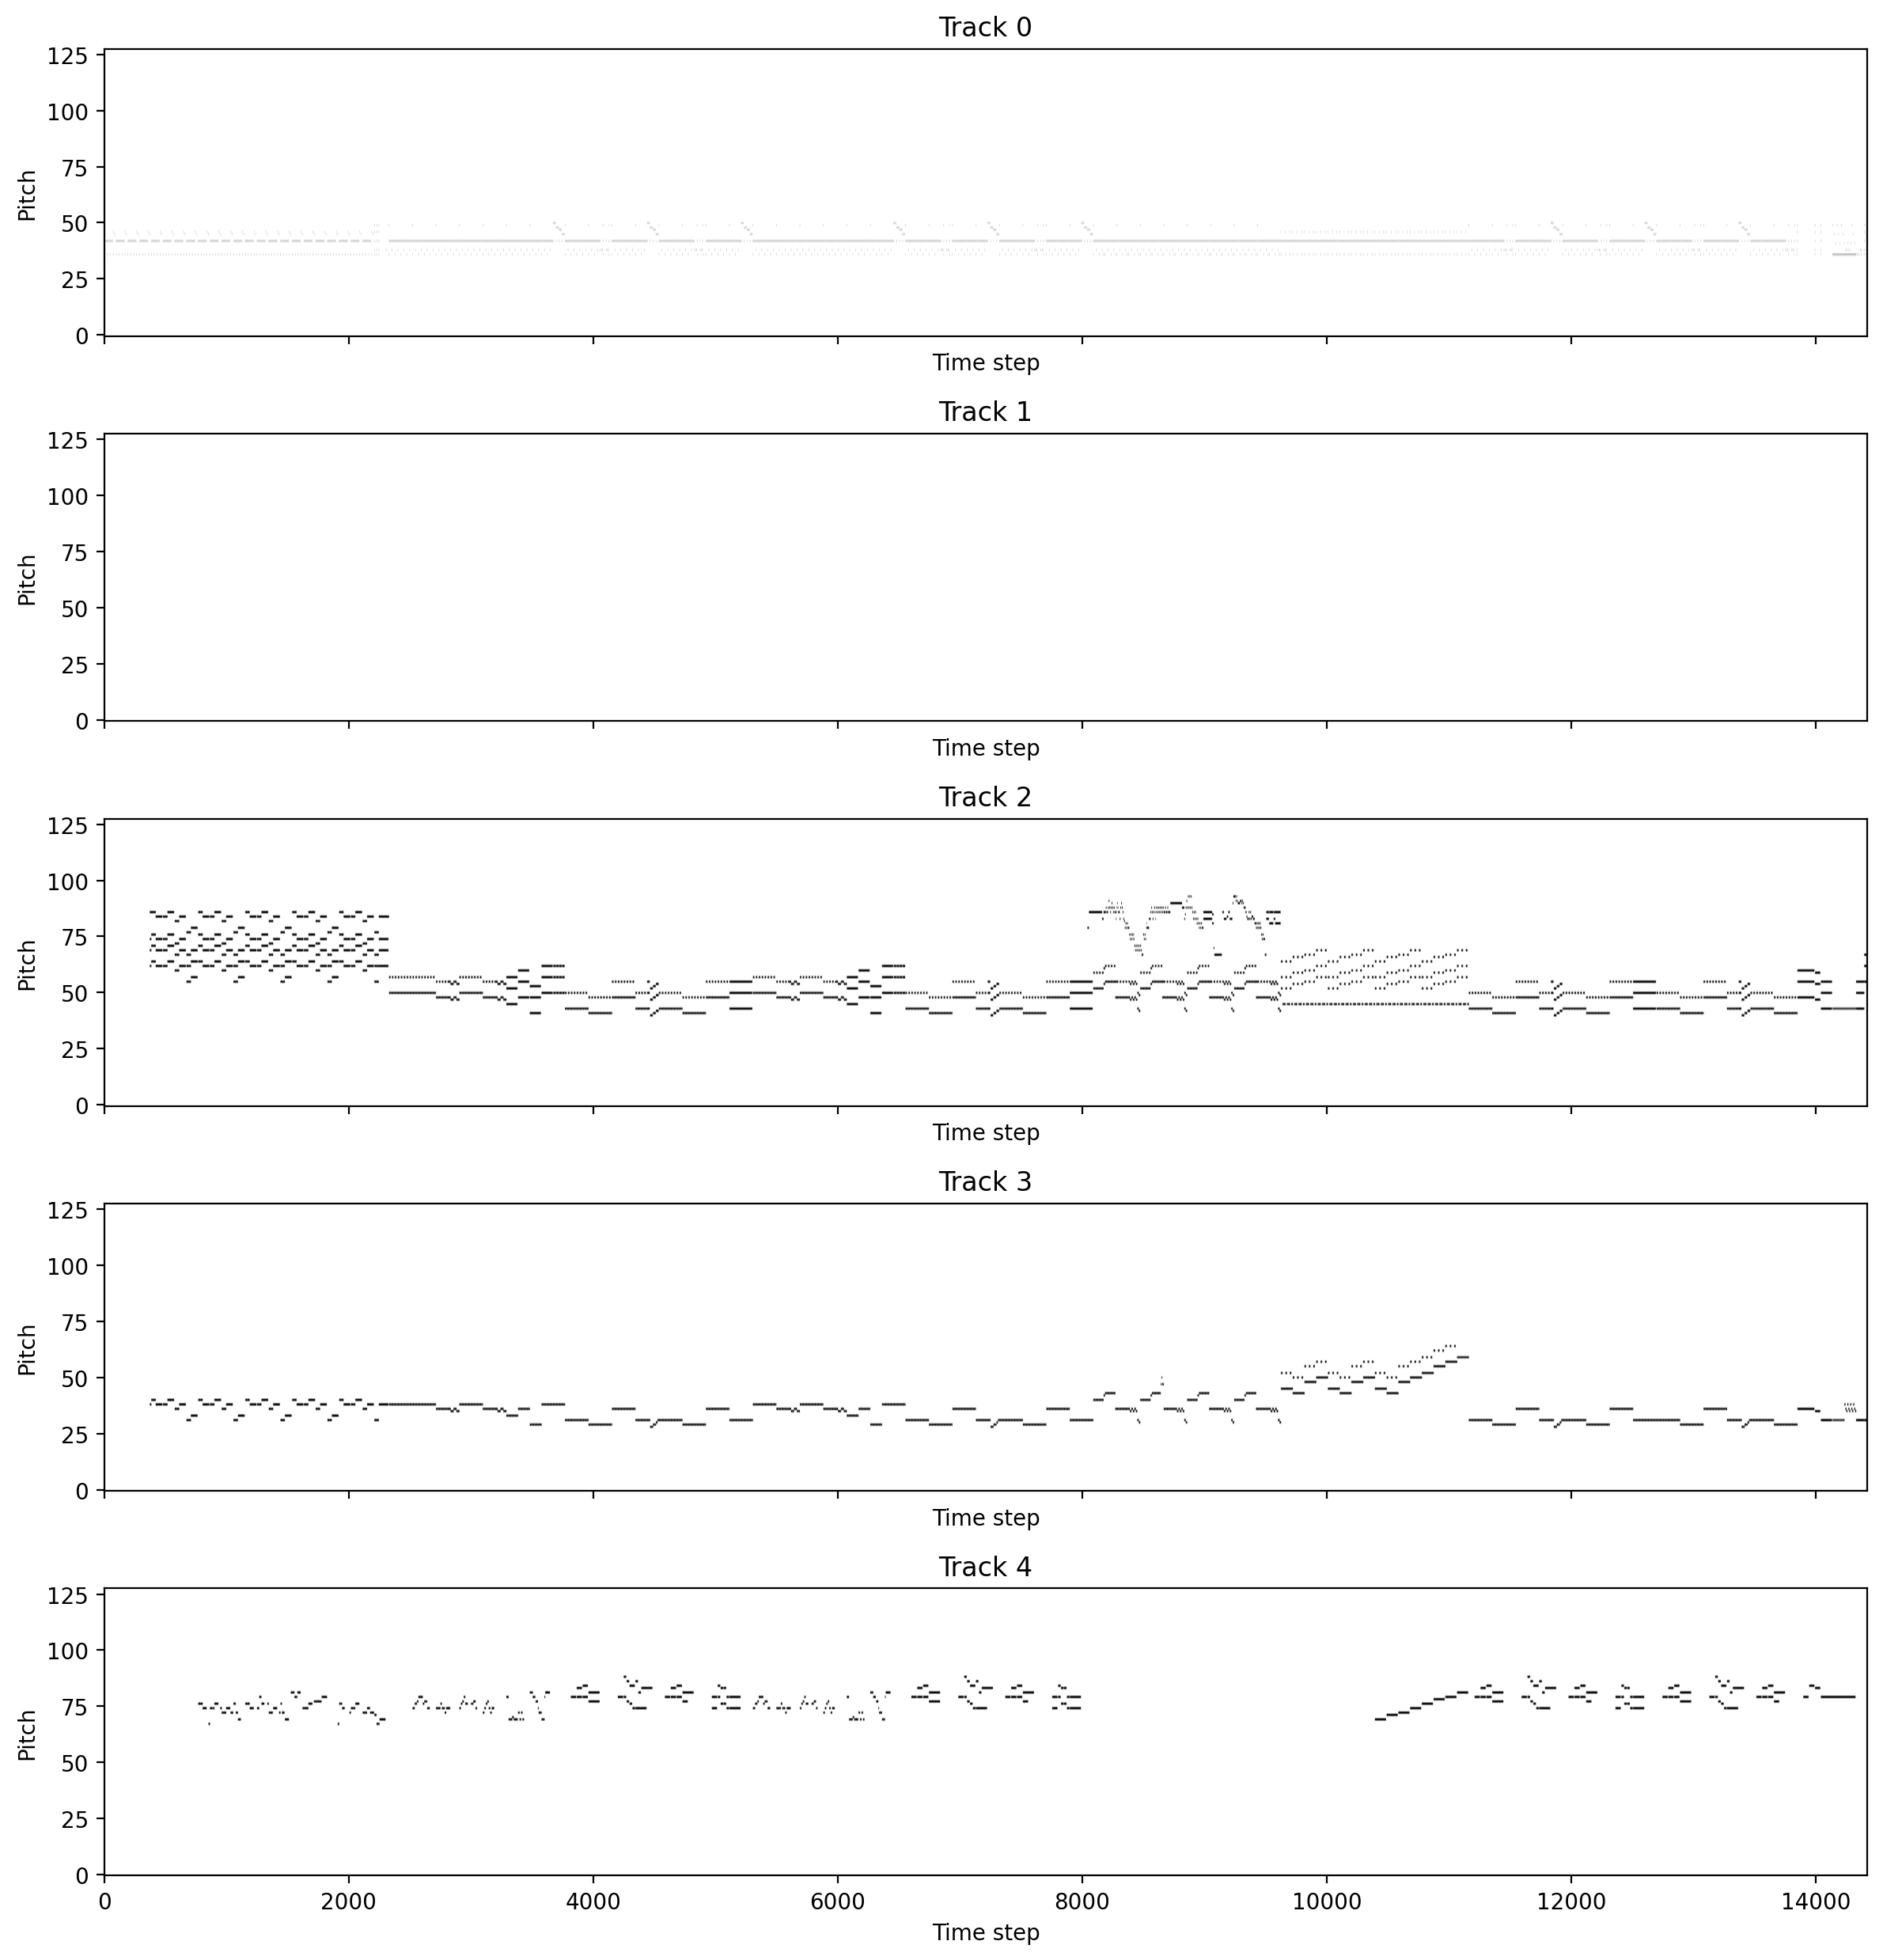

In [11]:
npz_path = "../midi/ea04f8ebe8f52d78ab6ce59d9ba04d20.npz"

tracks = load_all_tracks_from_npz(npz_path)
plot_all_tracks(tracks)


C:\Users\Hyperbook\AppData\Local\Temp\ipykernel_17704\285947276.py:46: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(pianoroll.T, aspect='auto', origin='lower', cmap='Greys')


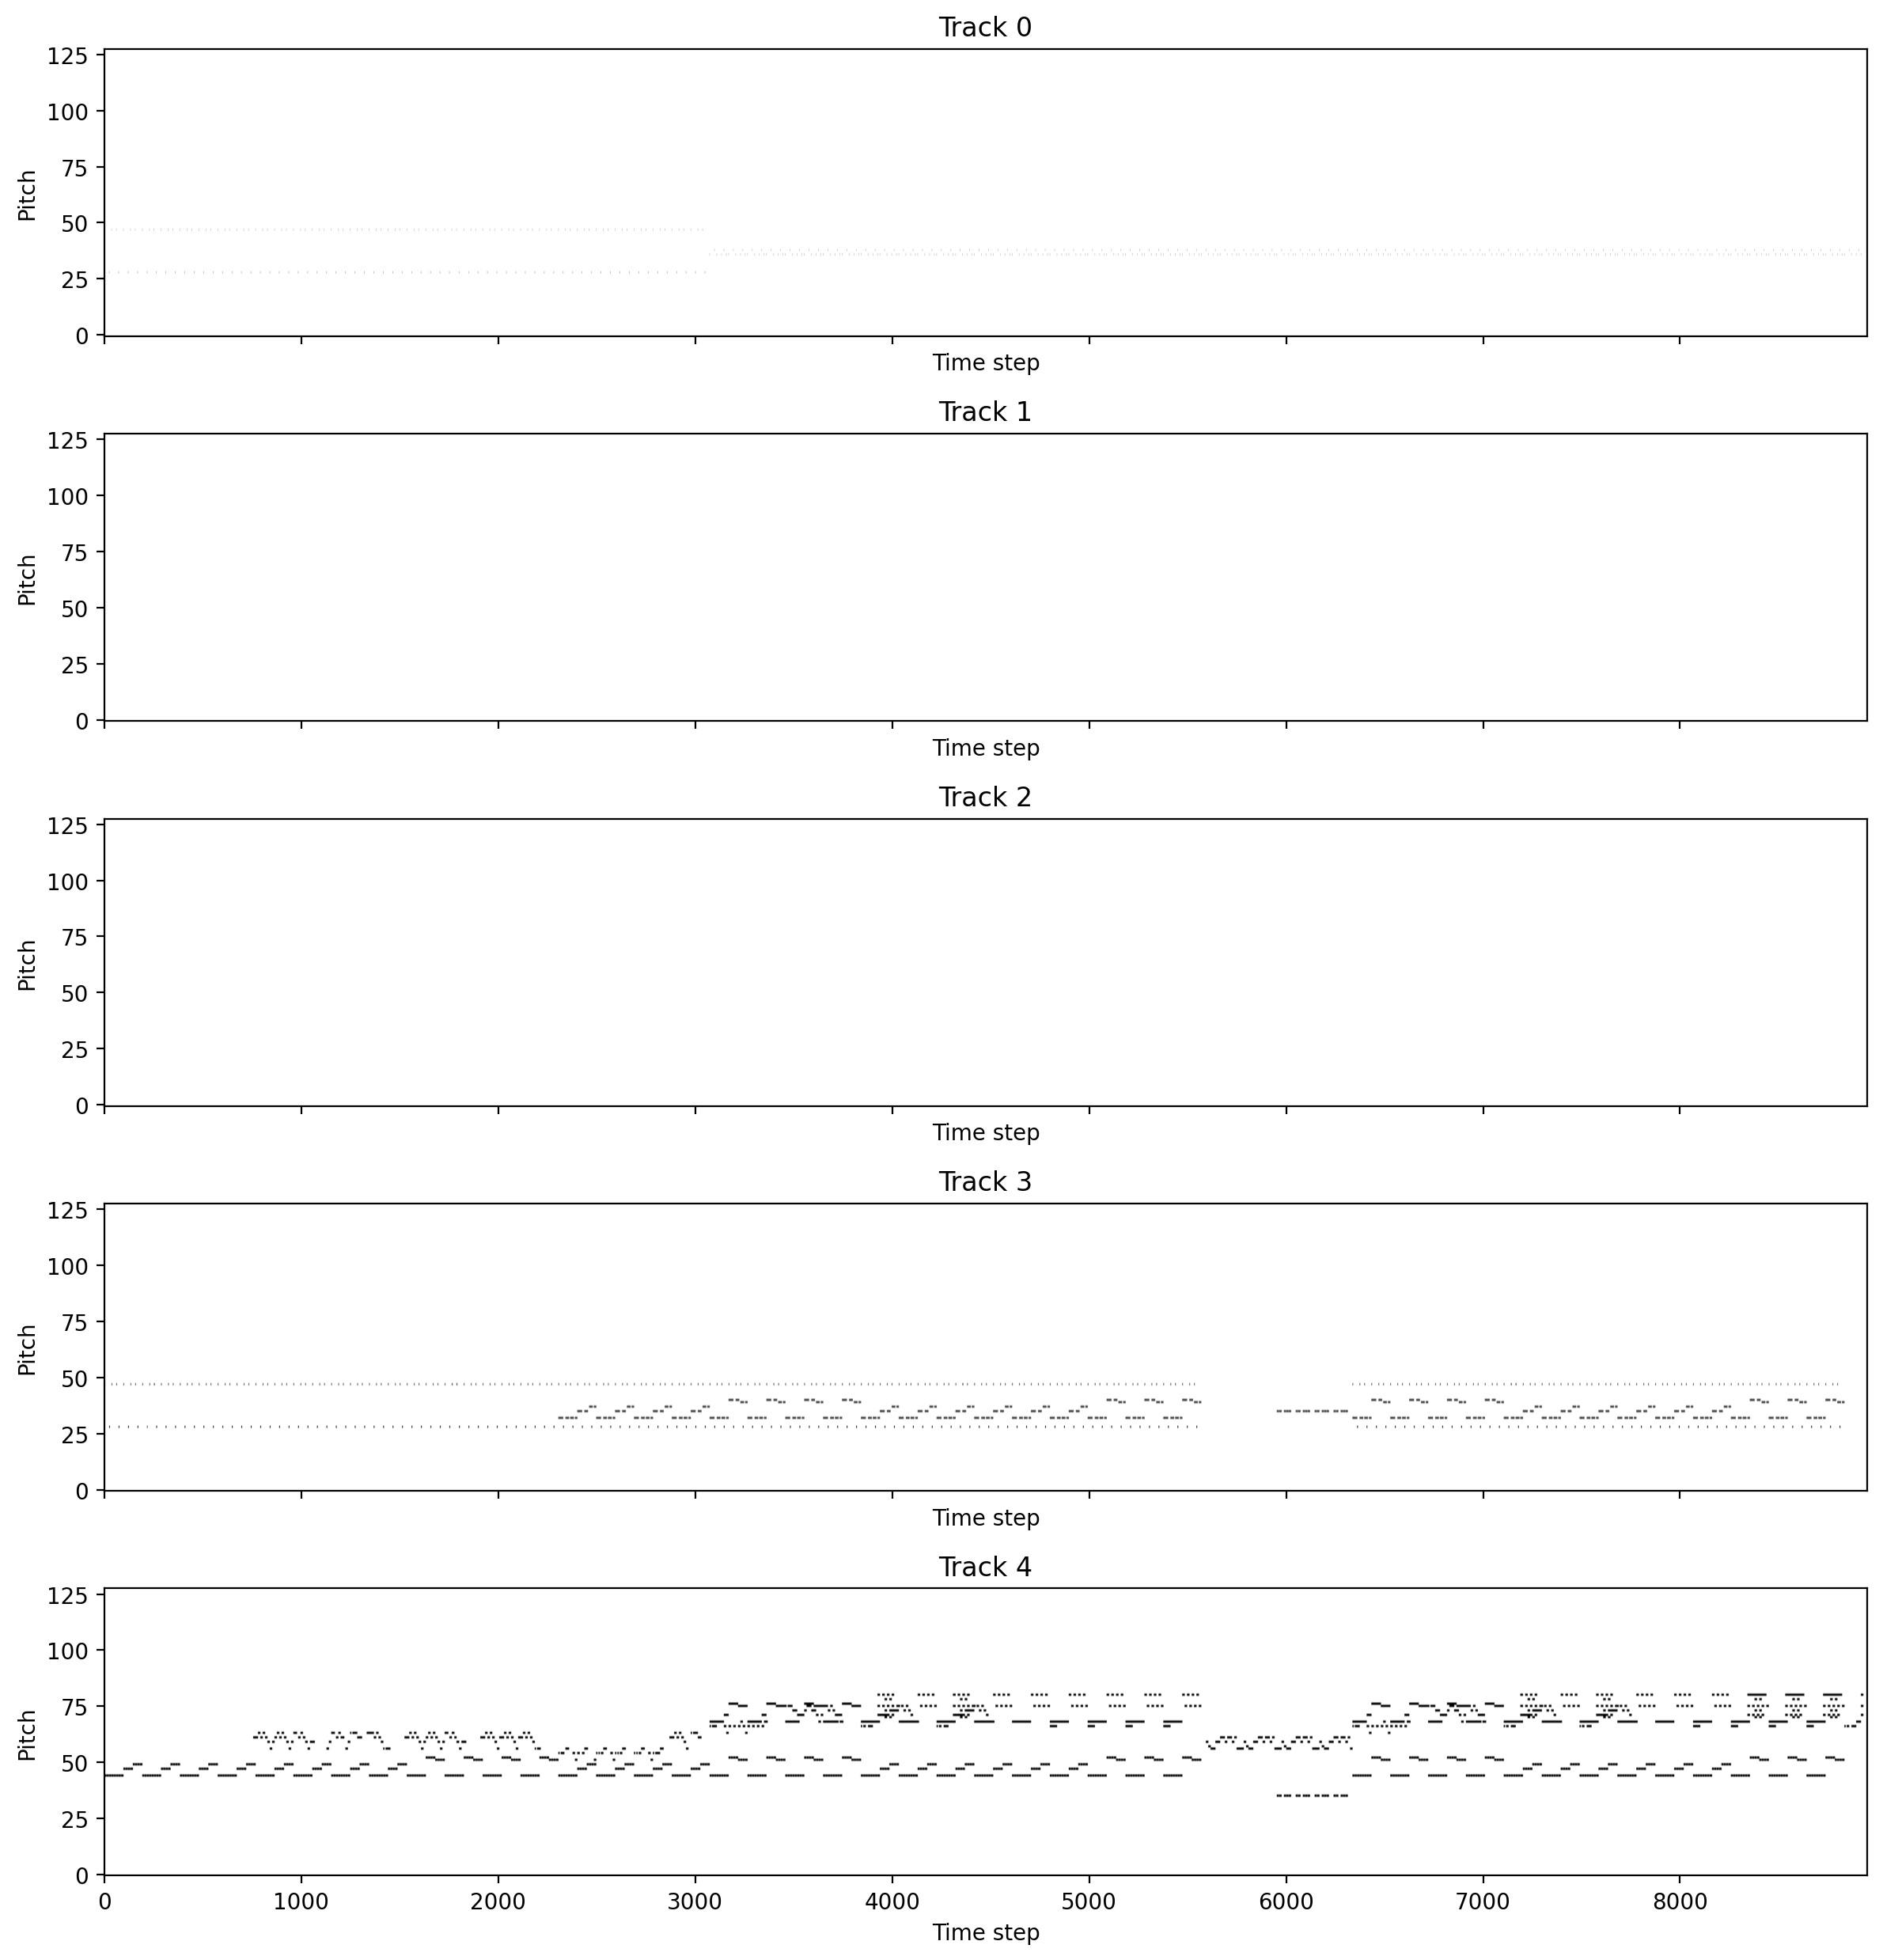

In [12]:
npz_path = "../midi/98f90636c139256f4b7dade28ab87088.npz"

tracks = load_all_tracks_from_npz(npz_path)
plot_all_tracks(tracks)